In [183]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
from side_functions import *

### Test naïve bag-of-words

In [240]:
train, test = get_train_test_data()

In [221]:
corpus, dictionary, ldamodel = get_lda_model(train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valentin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
display_lda_model(corpus, dictionary, ldamodel)

In [223]:
pipe = train_on_dataset(train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.7min finished


                        precision    recall  f1-score   support

              Désastre       0.87      0.74      0.80       938
Impossible de trancher       0.83      1.00      0.91         5
       Pas de désastre       0.83      0.92      0.87      1270

              accuracy                           0.84      2213
             macro avg       0.84      0.88      0.86      2213
          weighted avg       0.84      0.84      0.84      2213



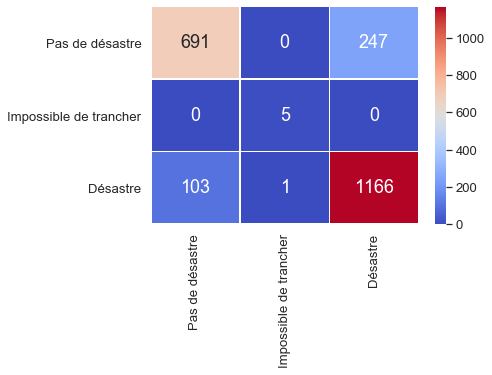

Pas de désastre 0.8279447301308582
Impossible de trancher 0.5
Désastre 0.8280901128080094


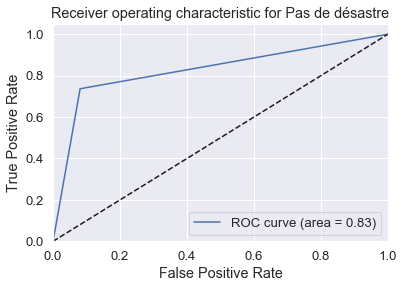

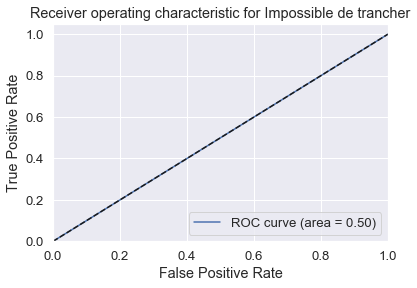

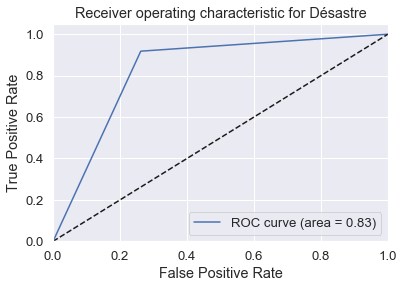

In [242]:
test_on_dataset(pipe, test)

### Test bag-of-words with words concatenation

In [243]:
train, test = get_train_test_data(find_and_concatenate_expressions=True)

In [244]:
pipe = train_on_dataset(train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.4min finished


                        precision    recall  f1-score   support

              Désastre       0.79      0.64      0.71       953
Impossible de trancher       0.00      0.00      0.00         6
       Pas de désastre       0.75      0.87      0.81      1206

              accuracy                           0.76      2165
             macro avg       0.51      0.50      0.50      2165
          weighted avg       0.77      0.76      0.76      2165



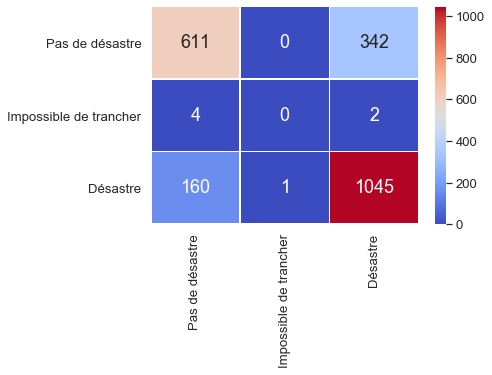

Pas de désastre 0.7529098660128343
Impossible de trancher 0.5
Désastre 0.7538969213715918


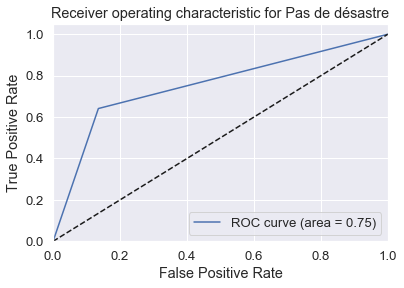

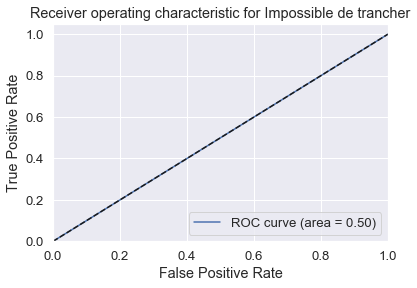

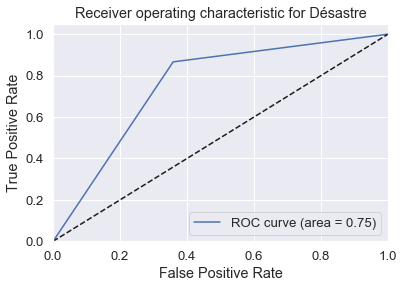

TypeError: cannot unpack non-iterable NoneType object

In [245]:
confusion_matrix, accuracy = test_on_dataset(pipe, test)
accuracy

### Test word2vec models

In [ ]:
train, test = get_train_test_data(find_and_concatenate_expressions=True)

In [ ]:
w2v = train_word2vec(train["token_retreated_text"])

In [ ]:
pipe = train_on_dataset(train, option="w2v", w2v_model=w2v)

In [ ]:
confusion_matrix, accuracy = test_on_dataset(pipe, test, option="w2v", w2v_model=w2v)
accuracy

### Test word2vec models

### Group expressions together

In [121]:
import nltk
from string import punctuation
from gensim.models.phrases import Phrases, Phraser
pyLDAvis.enable_notebook()

In [122]:
show_phrases(train["retreated_text"])

Expression : typhoon soudelor, score = 1249.9763313609467
Expression : heat wave, score = 1243.598901098901
Expression : exit 31, score = 2263.35
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expression : #dance #ices, score = 4243.78125
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expression : #dance #ices, score = 4243.78125
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expression : #dance #ices, score = 4243.78125
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expression : #dance #ices, score = 4243.78125
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expression : #dance #ices, score = 4243.78125
Expression : #dubstep #trapmusic, score = 4243.78125
Expression : #dnb #edm, score = 3353.111111111111
Expres

Expression : typhoon soudelor, score = 1249.9763313609467
Expression : rì ©, score = 2351.5324675324673
Expression : rì ©, score = 2351.5324675324673
Expression : rì ©, score = 2351.5324675324673
Expression : low self-image, score = 1741.0384615384617
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : low self-image, score = 1741.0384615384617
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : low self-image, score = 1741.0384615384617
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217
Expression : yours stand, score = 1148.0760869565217


Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901
Expression : heat wave, score = 1243.598901098901


In [110]:
clean_corpus(train["retreated_text"])

[['just', 'happened', 'a', 'terrible', 'car', 'crash'],
 ['our',
  'deeds',
  'are',
  'the',
  'reason',
  'of',
  'this',
  '#earthquake',
  'may',
  'allah',
  'forgive',
  'us',
  'all'],
 ['heard',
  'about',
  '#earthquake',
  'is',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.'],
 ['there',
  'is',
  'a',
  'forest',
  'fire',
  'at',
  'spot',
  'pond',
  ',',
  'geese',
  'are',
  'fleeing',
  'across',
  'the',
  'street',
  ',',
  'i',
  'cannot',
  'save',
  'them',
  'all'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada'],
 ['all',
  'residents',
  'asked',
  'to',
  "'",
  'shelter',
  'in',
  'place',
  "'",
  'are',
  'being',
  'notified',
  'by',
  'officers',
  '.',
  'no',
  'other',
  'evacuation',
  'or',
  'shelter',
  'in',
  'place',
  'orders',
  'are',
  'expected'],
 ['13,000',
  'people',
  'receive',
  '#wildfires',
  'evacuation',
  'orders',
  'in',
  'california'],
 ['just',
  'got',
  'sent',
  'this',
  'ph

### Add some stuff

In [ ]:
def histogram(df,col = 0, n_words = 20):
    #n_words is number of words we want to plot
    df_plt = df.sort_values(by = col, ascending=False)
    df_plt = df_plt.iloc[:n_words,col]
    
    y_pos = np.arange(n_words)
    plt.barh(y_pos, list(df_plt), align='center')
    plt.yticks(y_pos, df_plt.index)
    plt.axis([10*int(min(df_plt)/10), 10*int(max(df_plt)/10+1),-1.39, 20.39])
    #If all values are superior to 1000, no need to show in the axis 0 to 1000.
    
    plt.show()
    
def best_words(df):
    #For each label, we will see what are the most important words that could caracterize this label
    
    vect, l_t = create_bagofwords(df['text'], max_feat = 5000)
    for v in y_train.columns :
        work = df[df['label'].apply(lambda x : x == [int(v)])]
        #To see what words caracterize a label we need to keep the texts that have only this label.
        w_t = [l_t[t] for t in work.index] #We retrieve the bag of words of these texts
        if w_t :
            sum_l = sum(w_t) #We sum the score of each word
            occurences = {w : sum_l[vect.vocabulary_[w]] for w in vect.vocabulary_}
            df_occ = pd.DataFrame(occurences, index = [0]).transpose()
            print("Les 20 mots les plus utilisés dans les {:>4} textes labelisés uniquement par {} :".format(len(w_t),v))
            histogram(df_occ)
        else :
            print("Aucun texte n'est labélisé uniquement par {}".format(v))

best_words(X_train)

### Test word_2_vec

### Train/Test files + Tweet Tokenizer

D:\Users\Simon\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\Simon\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\Simon\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Bag of words

NameError: name 'list_text' is not defined

In [31]:
### Train/Test files

0                [just, happened, a, terrible, car, crash]
1        [our, deeds, are, the, reason, of, this, #eart...
2        [heard, about, #earthquake, is, different, cit...
3        [there, is, a, forest, fire, at, spot, pond, ,...
4         [forest, fire, near, la, ronge, sask, ., canada]
                               ...                        
10871    [m1, ., 94, [, 01:04, utc, ], ?, 5km, s, of, v...
10872    [police, investigating, after, an, e-bike, col...
10873    [the, latest, :, more, homes, razed, by, north...
10874    [meg, issues, hazardous, weather, outlook, (, ...
10875    [#cityofcalgary, has, activated, its, municipa...
Name: text, Length: 10876, dtype: object

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import scipy
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
#Metrics
from sklearn.metrics import precision_score # tp      / ( tp + fp )
from sklearn.metrics import accuracy_score  # tp + tn / ( tp + fp + tn + fn  ) 
from sklearn.metrics import recall_score    # tp      / ( tp + fn )
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
dict_score = {'precision' : precision_score, 'accuracy' : accuracy_score,\
              'recall score' : recall_score, \
              'confusion_matrix' : confusion_matrix}

#Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#word2vec
import gensim

#PCA
from sklearn.decomposition import PCA

#NLP
import re
import nltk
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words
from nltk.tokenize.casual import TweetTokenizer # 

stemmer = SnowballStemmer('english')
stop_w = set(stopwords.words("english"))
stop_w.update(stop_words.ENGLISH_STOP_WORDS)
stop = set([stemmer.stem(w) for w in stop_w])

#Google
# dire = 'C:\\Users\\Simon\\Desktop\\hoodie\\Bilou\\'
# import gensim as gs
# google = gs.models.KeyedVectors.load_word2vec_format(dire + "GoogleNews-vectors-negative300.bin", binary=True)